# Spam Identification 

This is not the exact solution implemented by gmail but you will get an insight of what is happening inside any spam detection algo.

In [7]:
import pandas as pd
docs=pd.read_table("SMSSpamCollection+(1)",header=None, names=['Class','SMS'])
docs.head()

,Class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Counting spam and ham 
ham_spam=docs.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [10]:
print("Spam % is",(ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100)

Spam % is 13.406317300789663


In [11]:
docs['label']=docs.Class.map({'ham':0,'spam':1})
docs.head()

,Class,SMS,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [13]:
x=docs.SMS
y=docs.label

In [15]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [16]:
x_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: SMS, dtype: object

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer(stop_words="english")

In [18]:
vec.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [19]:
vec.vocabulary_

{'4mths': 509,
 'half': 3089,
 'price': 5027,
 'orange': 4626,
 'line': 3852,
 'rental': 5310,
 'latest': 3763,
 'camera': 1527,
 'phones': 4822,
 'free': 2780,
 'phone': 4818,
 '11mths': 264,
 'mobilesdirect': 4248,
 '08000938767': 50,
 'update': 6673,
 'or2stoptxt': 4624,
 'cs': 1971,
 'did': 2169,
 'stitch': 6028,
 'trouser': 6545,
 'hope': 3260,
 'enjoyed': 2436,
 'new': 4442,
 'content': 1867,
 'text': 6321,
 'stop': 6038,
 '61610': 563,
 'unsubscribe': 6665,
 'help': 3180,
 '08712400602450p': 98,
 'provided': 5089,
 'tones2you': 6473,
 'uk': 6614,
 'heard': 3159,
 'u4': 6608,
 'rude': 5443,
 'chat': 1643,
 'private': 5040,
 '01223585334': 5,
 'cum': 1989,
 'wan': 6852,
 '2c': 374,
 'pics': 4837,
 'gettin': 2913,
 'shagged': 5628,
 'pix': 4858,
 '8552': 660,
 '2end': 378,
 'send': 5590,
 'sam': 5487,
 'xxx': 7127,
 'neva': 4438,
 'tell': 6289,
 'noe': 4477,
 'home': 3244,
 'da': 2015,
 'aft': 826,
 'wat': 6876,
 'wiskey': 7012,
 'brandy': 1389,
 'rum': 5450,
 'gin': 2927,
 'beer':

In [22]:
x_train_transform=vec.transform(x_train)
x_test_transform=vec.transform(x_test)
print(x_train_transform)

  (0, 50)	1
  (0, 264)	1
  (0, 509)	1
  (0, 1527)	1
  (0, 1971)	1
  (0, 2780)	2
  (0, 3089)	1
  (0, 3763)	1
  (0, 3852)	1
  (0, 4248)	1
  (0, 4624)	1
  (0, 4626)	1
  (0, 4818)	1
  (0, 4822)	1
  (0, 5027)	1
  (0, 5310)	1
  (0, 6673)	1
  (1, 2169)	1
  (1, 6028)	1
  (1, 6545)	1
  (2, 98)	1
  (2, 563)	1
  (2, 1867)	1
  (2, 2436)	1
  (2, 3180)	1
  :	:
  (4176, 3879)	1
  (4176, 4417)	1
  (4176, 5229)	1
  (4176, 6191)	1
  (4176, 7134)	1
  (4177, 254)	1
  (4177, 307)	1
  (4177, 358)	1
  (4177, 831)	1
  (4177, 2046)	1
  (4177, 2704)	1
  (4177, 3585)	1
  (4177, 3623)	1
  (4177, 4130)	1
  (4177, 4315)	1
  (4177, 4771)	1
  (4177, 5234)	1
  (4177, 5321)	1
  (4177, 5487)	1
  (4177, 5620)	1
  (4177, 6321)	1
  (4177, 6374)	1
  (4177, 6453)	1
  (4178, 1643)	1
  (4178, 5817)	1


# Building a model with Multinomial theorem

In [23]:
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()

mnb.fit(x_train_transform,y_train)

#predict class
y_pred_class=mnb.predict(x_test_transform)

#predict probability
y_pred_proba=mnb.predict_proba(x_test_transform)

#printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.9877961234745154

In [24]:
# here alpha=1 is used for smoothing data automatically
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
#confusion matrix
conf=metrics.confusion_matrix(y_test,y_pred_class)
print(conf)
TN=conf[0,0]
FP=conf[0,1]
FN=conf[1,0]
TP=conf[1,1]

[[1201    7]
 [  10  175]]


This matrix denotes that the value at index(0,1) is 7 which means that 7 emails are there which were actually ham but we predicted them as spam so our important mails will go into spam we have to reduce this number and improve our model to predict more accurately.

In [29]:
#calculating sensitivity
sensitivity=TP/float(FN+TP)
print("sensitivity : ",sensitivity)

sensitivity :  0.9459459459459459


In [30]:
#calculating specificity
specificity=TN/float(TN+FP)
print("specificity : ",specificity)

specificity :  0.9942052980132451


In [32]:
#calculating precision
precision=TP/float(TP+FP)
print("precision : ",precision)

precision :  0.9615384615384616


In [33]:
print("Precision : ",precision)
print("Precision Score : ",metrics.precision_score(y_test,y_pred_class))
print("Recall : ",metrics.recall_score(y_test,y_pred_class))
print("F1 Score : ",metrics.f1_score(y_test,y_pred_class))

Precision :  0.9615384615384616
Precision Score :  0.9615384615384616
Recall :  0.9459459459459459
F1 Score :  0.9536784741144414


In [34]:
#creating a ROC curve
from sklearn.metrics import roc_curve,auc

import matplotlib.pyplot as plt

false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,y_pred_proba[:,1])
roc_auc=auc(false_positive_rate,true_positive_rate)

print(roc_auc)

0.9921872203329157


In [35]:
print(true_positive_rate)

[0.30810811 0.31351351 0.33513514 0.34054054 0.35135135 0.36756757
 0.4        0.41081081 0.59459459 0.60540541 0.61621622 0.62702703
 0.67567568 0.68648649 0.71891892 0.72972973 0.94594595 0.94594595
 0.94594595 0.94594595 0.95135135 0.95135135 0.96756757 0.96756757
 0.96756757 0.96756757 0.96756757 0.96756757 0.96756757 0.96756757
 0.96756757 0.96756757 0.96756757 0.97297297 0.97297297 0.97297297
 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297
 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297
 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297 0.97297297
 0.97297297 0.97837838 0.97837838 0.97837838 0.97837838 0.97837838
 0.97837838 0.97837838 0.97837838 0.97837838 0.97837838 0.97837838
 0.97837838 0.98378378 0.98378378 0.98378378 0.98378378 0.98918919
 0.98918919 0.98918919 0.98918919 0.99459459 0.99459459 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.     

In [36]:
print(false_positive_rate)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00165563
 0.00331126 0.0115894  0.0115894  0.01324503 0.01324503 0.02235099
 0.02400662 0.0281457  0.03890728 0.04470199 0.04635762 0.04966887
 0.05711921 0.06043046 0.06125828 0.06125828 0.06374172 0.06870861
 0.07036424 0.0736755  0.07533113 0.08360927 0.08857616 0.09519868
 0.0968543  0.10099338 0.10264901 0.11672185 0.11837748 0.12665563
 0.12831126 0.13162252 0.13327815 0.14072848 0.14238411 0.14652318
 0.1531457  0.1531457  0.1589404  0.16059603 0.16307947 0.1647351
 0.20943709 0.21109272 0.22930464 0.23096026 0.23592715 0.2384106
 0.26655629 0.26655629 0.27400662 0.27566225 0.29304636 0.29304636
 0.30215232 0.30380795 0.30711921 0.30711921 0.31291391 0.31291391
 0.32036424 0.32201987 0.37086093 0.37251656 0.38493377 0.3865894
 0.43708609 0.43956954 0.46854305 0.47019868 0.59271523 0.59437086
 0.64403974 0.

In [37]:
print(threshold)

[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.99999996e-01 9.99999996e-01 9.99999995e-01 9.99999994e-01
 9.99999891e-01 9.99999451e-01 9.99998530e-01 9.99997944e-01
 8.23259521e-01 6.03514139e-01 5.57484017e-01 2.93007628e-01
 2.83243254e-01 2.56756624e-01 2.53425148e-01 1.34568519e-01
 1.34539652e-01 1.34510790e-01 1.34481933e-01 1.01551419e-01
 9.39254835e-02 9.38832989e-02 7.38341494e-02 7.21048341e-02
 7.10172010e-02 7.04886074e-02 6.89078701e-02 6.08617913e-02
 6.02739339e-02 5.85415571e-02 5.85278961e-02 4.92769211e-02
 4.92536993e-02 3.98139183e-02 3.97949694e-02 3.74097322e-02
 3.74097322e-02 2.88222872e-02 2.87588101e-02 2.52608490e-02
 2.52547459e-02 2.25172886e-02 2.17200381e-02 1.91483675e-02
 1.90614072e-02 1.90567726e-02 1.65820422e-02 1.63327142e-02
 1.53112191e-02 1.53037461e-02 1.47786698e-02 1.45856255e-02
 7.97660888e-03 7.90702710e-03 6.19870579e-03 6.17975072e-03
 5.62111311e-03 5.594441

In [40]:
pd.DataFrame({'threshold':threshold,
             'TPR':true_positive_rate,
             'FPR':false_positive_rate})

,threshold,TPR,FPR
0,1.000000e+00,0.308108,0.000000
1,1.000000e+00,0.313514,0.000000
2,1.000000e+00,0.335135,0.000000
3,1.000000e+00,0.340541,0.000000
4,1.000000e+00,0.351351,0.000000
5,1.000000e+00,0.367568,0.000000
6,1.000000e+00,0.400000,0.000000
7,1.000000e+00,0.410811,0.000000
8,1.000000e+00,0.594595,0.000000
9,1.000000e+00,0.605405,0.000000


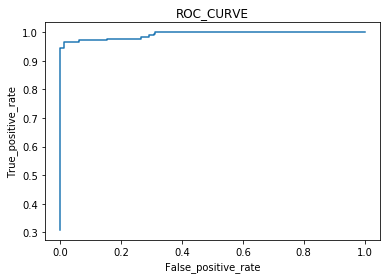

In [41]:
#plotting ROC curve
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate')
plt.title('ROC_CURVE')
plt.plot(false_positive_rate,true_positive_rate)

# Building model with BernoulliNB

We have seen that there were 7 values which we were getting wrong so we will try it with another aglorithm in hope that this time our model will improve

In [43]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train_transform,y_train)
y_pred_class=bnb.predict(x_test_transform)
y_pred_proba=bnb.predict_proba(x_test_transform)

#calculating accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)


0.9770279971284996

We can see that our accuracy got little low than abovemodel

In [44]:
metrics.confusion_matrix(y_test,y_pred_class)

array([[1207,    1],
       [  31,  154]], dtype=int64)

-------> Though our accuracy got little low but we can see that now our false positive value is 1 which means that only one mail which is ham might be predicted spam so we won't loose our important email.

# Important note:

---> Don't blindly go for accuracy look according to business prespective we have to predict the import thing correctly not everything.

# X----------X---- NIAVE BAYES ENDS----X-----------X